In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import os

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import os
images = []
y_train = []

for dicname in sorted(os.listdir("./train/")):
    #filedir = "dicname"
    train_folder_path = os.path.join(os.getcwd(), "train", dicname)
    
    for filename in sorted(os.listdir(train_folder_path)):
        img = cv2.imread(os.path.join(train_folder_path,filename))
        
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (100,100))
            images.append(img)
            if dicname == "street":
                y_train.append(1)
            elif dicname == "industrial":
                y_train.append(2)
            elif dicname == "insidecity":
                y_train.append(3)
            elif dicname == "forest":
                y_train.append(4)
            elif dicname == "livingroom":
                y_train.append(5)
            elif dicname == "opencountry":
                y_train.append(6)
            elif dicname == "PARoffice":
                y_train.append(7)
            elif dicname == "mountain":
                y_train.append(8)
            elif dicname == "CALsuburb":
                y_train.append(9)
            elif dicname == "coast":
                y_train.append(10)
            elif dicname == "store":
                y_train.append(11)
            elif dicname == "bedroom":
                y_train.append(12)
            elif dicname == "tallbuilding":
                y_train.append(13)
            elif dicname == "highway":
                y_train.append(14)
            elif dicname == "kitchen":
                y_train.append(0)
                
x_train = np.array(images)
#x_train = x_train.reshape(2985,100,100,1)
#y_train = np.array(y_train)
#y_trian =  pd.get_dummies(y_train)
#y_train = np.array(y_train)

In [3]:
import keras
#y_train= pd.get_dummies(y_train)
y_train = np.array(y_train)
y_train = keras.utils.to_categorical(y_train, 15)
print(y_train.shape + x_train.shape)

(2985, 15, 2985, 100, 100, 3)


Using TensorFlow backend.


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
      dtype=float32)

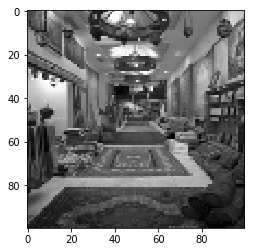

In [19]:
plt.imshow(x_train[1])
y_train[1]

In [5]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state= 12, shuffle=True)
print("x_train shape:", x_train.shape)
print("numbers of training sample:", x_train.shape[0])
print("numbers of testing sample:", y_train.shape)

x_train shape: (2388, 100, 100, 3)
numbers of training sample: 2388
numbers of testing sample: (2388, 15)


In [7]:
from keras.layers import GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
# build our CNN model
model = Sequential()

model.add(Conv2D(64,(3,3), padding='same',input_shape = (100,100,3)))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(128,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(256,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax'))


In [8]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
#model = VGG_16()
optimizer = SGD(lr=0.0001, momentum=0.9)
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_train /= 255.
x_valid /= 255.

In [9]:
print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    rotation_range=30,  # randomly rotate images in the range -30~30
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

Using real-time data augmentation.


In [10]:
import os
#os.chdir('///home/jovyan/program/DL/11_1下tensorflow_simpson')
save_dir = os.path.join(os.getcwd(),'saved_model')
print(os.getcwd())
model_name = "classification_cnn_model1"
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(model_path, monitor = 'loss', 
                            save_best_only=True, verbose=1)
#earlystop
earlystop = EarlyStopping(monitor='loss', patience=5, verbose =1)

/home/jovyan/Kaggle_test/image_classification_CNN


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 64)      1792      
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
activation_2 (Activation)    (None, 100, 100, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
activation_3 (Activation)    (None, 50, 50, 128)       0         
__________

In [12]:
batch_size = 30
epochs = 20
#workers = 用4個GPU
#verbose是否再進度調顯示

model_history = model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    epochs=epochs,
                    workers=4,
                    validation_data=(x_valid, y_valid),
                    callbacks=[checkpoint,earlystop])
'''
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_valid, y_valid))
'''
print("Loading trained model")
model = load_model(model_path)

Epoch 1/20
80/80 [==============================] - 10s 123ms/step - loss: 2.7078 - acc: 0.0724 - val_loss: 2.7073 - val_acc: 0.0888

Epoch 00001: loss improved from inf to 2.70784, saving model to /home/jovyan/Kaggle_test/image_classification_CNN/saved_model/classification_cnn_model1
Epoch 2/20
80/80 [==============================] - 5s 69ms/step - loss: 2.7066 - acc: 0.1035 - val_loss: 2.7065 - val_acc: 0.0804

Epoch 00002: loss improved from 2.70784 to 2.70664, saving model to /home/jovyan/Kaggle_test/image_classification_CNN/saved_model/classification_cnn_model1
Epoch 3/20
80/80 [==============================] - 6s 71ms/step - loss: 2.7055 - acc: 0.1107 - val_loss: 2.7057 - val_acc: 0.0804

Epoch 00003: loss improved from 2.70664 to 2.70555, saving model to /home/jovyan/Kaggle_test/image_classification_CNN/saved_model/classification_cnn_model1
Epoch 4/20
80/80 [==============================] - 6s 72ms/step - loss: 2.7045 - acc: 0.1106 - val_loss: 2.7049 - val_acc: 0.0804

Epoch 

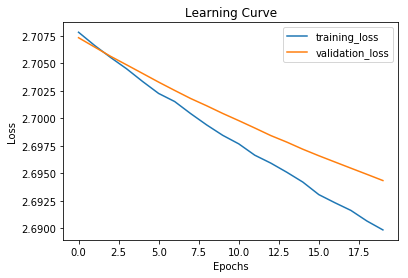

In [13]:
training_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.plot(training_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

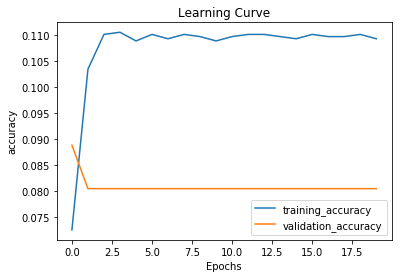

In [14]:
training_acc = model_history.history['acc']
val_acc = model_history.history['val_acc']

plt.plot(training_acc, label="training_accuracy")
plt.plot(val_acc, label="validation_accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

In [15]:
scores = model.evaluate(x_valid, y_valid, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

597/597 [==============================] - 1s 1ms/step
Test loss: 2.6943354015573986
Test accuracy: 0.08040201011265143


In [22]:
test_pred =model.predict(x_valid)
test_pred
final=np.argmax(test_pred, axis=1)

In [28]:
dataFrame = pd.DataFrame({"id":id,"class":labels})

dataFrame.to_csv("my_submit.csv",index = False)

NameError: name 'labels' is not defined